<a href="https://colab.research.google.com/github/GabeMaldonado/SQL/blob/master/PostgreSQL_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notes on Postgresql for Data Analysis -- III

- [1. Subqueries ](#1)

<a name='1'></a >
##Subqueries
Subqueries, also known as *inner queries* and/or *nested queries* are tools that allows us to answer more compelx questions than we can from a single database table. A subquery allows us to query an existing table which itself was created from a prior/inital query to the db. 
Let's look at the following example:
*   This is the inner query:
```
SELECT DATE_TRUNC('day', occurred_at) AS day,
       channel,
       COUNT(*) AS event_count
FROM web_events
GROUP BY 1, 2
ORDER BY 1
LIMIT 5;
```
and it will return the following output:


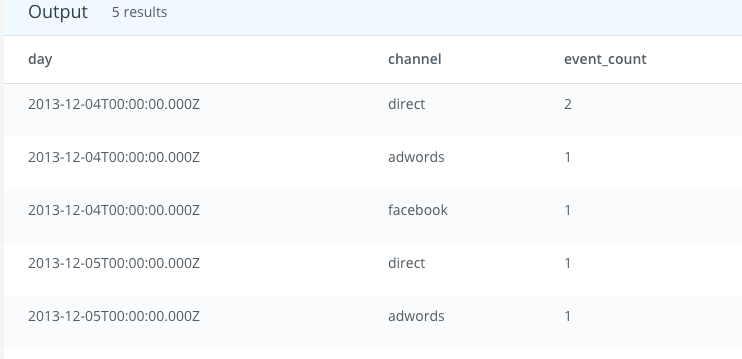

In [1]:
from IPython.display import Image
Image(filename="/content/Postgresql_init_query.png")

*   We can now create a subquery to get more insights from the data we retrieved from the inner query. We do it by wrapping the inner query in parenthesis and type the statements for the subquery at the the top of the inner query:
```
SELECT channel,
       AVG(event_count) AS avg_event_count
FROM (SELECT DATE_TRUNC('day', occurred_at) AS day,
         channel,
         COUNT(*) AS event_count
         FROM web_events
         GROUP BY 1, 2) AS sub
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;
```
Here we see that in the sub query we are selecting the channel and also, we are aggregating on the `AVG` of the `event_count` columnn that was produced by the inner query. Keep in mind that the inner query always runs first and creates the initial output table. The we use the `FROM` on the inner query becasue we want to retrieve data from the inner query. Notice that after the closing parenthesis of the inner query we alias the sub query `AS sub` and we cal also pass other arguments such `GROUP BY`,  `ORDER BY` and `LIMIT` to our sub query.
It is best practice to write query in a readable manner. Altough the intended output would be the same-- do not write a query in a single line. This makes the query diffucult to read. Identation works best at making the query more readable as seen above. 

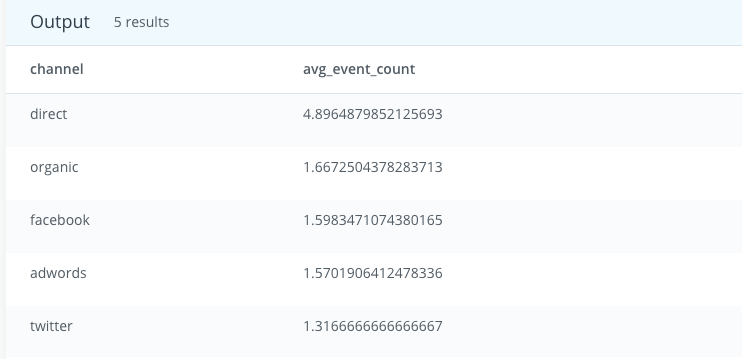

In [4]:
Image(filename="/content/Postgresql_sub_query.png")

In the query above we create a table by running an inner query and the queried that table using `FROM` in the sub query. This worked because we returned a table but if the inner query returns a single value then we we must use that value in a logical statement such as `WHERE`, `HAVING`, `CASE` and even a `SELECT` statement. As an example, let's say that we want to look at all the orders from the month the that the first ever order was placed. We would use a inner query to return the date/month for the first order and then use a sub query to query the other conditions. 
```
SELECT DATE_TRUNC('month', MIN(occurred_at))
       FROM orders;
```
This will return the date we are after:



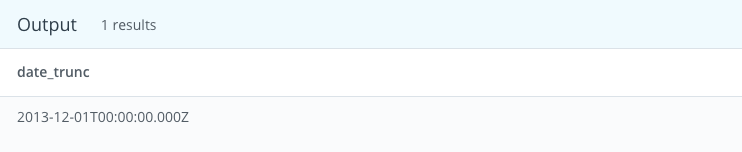

In [6]:
Image('/content/Postgresql_DATE_TRUNC.png')